<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada / M0.539 · Inteligencia Artificial</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## **My work** - Code chapter 2: recommenders and clustering

# **Code 2.1:** Euclidean distance and similarity between two vectors

In [ ]:
# This code demonstrates how to calculate Euclidean distance and similarity between two vectors
# The Euclidean distance measures how "far apart" two points/vectors are
# The similarity is calculated as 1/(1+distance) to get a value between 0 and 1, where:
# - Values closer to 1 mean more similar
# - Values closer to 0 mean less similar

import numpy as np  # numpy for array operations
from scipy.spatial.distance import euclidean  # euclidean distance function from scipy

# Create two sample vectors with 5 dimensions each
# These could represent, for example, ratings that two users gave to 5 different movies
a = np.array([5, 3, 4, -1, 0])   # First vector
b = np.array([2, 4, 0, -5, -2])  # Second vector

# Calculate the Euclidean distance between vectors a and b
# The Euclidean distance is the square root of the sum of squared differences
dist = euclidean(a, b)
print('Distance =', dist)

# Convert distance to similarity using the formula 1/(1+distance)
# This transformation has useful properties:
# - When distance = 0 (identical vectors), similarity = 1
# - As distance grows larger, similarity approaches 0
# - Always gives values between 0 and 1
simil = 1 / (1 + dist)
print('Similarity =', simil)

# Note: This similarity metric is often used in recommender systems
# to find users or items that are "close" to each other in some feature space

Distance = 6.782329983125268
Similarity = 0.12849622184722817


# **Code 2.2:** Pearson correlation coefficient between two vectors

In [ ]:
# This code calculates the Pearson Correlation Coefficient between two vectors.
# Pearson Correlation measures how strongly two variables are related (linear correlation).
#  Values range from -1 to 1:
#   if 1: Perfect positive correlation (when one increases, the other increases)
#   if -1: Perfect negative correlation (when one increases, the other decreases)
#   if 0: No correlation (completely independent variables)

import numpy as np  # Importing NumPy for numerical operations
from scipy.spatial.distance import correlation  # Importing correlation function from SciPy

# Define two vectors (e.g., two users' ratings on different items)
# Each value represents some measurable attribute, such as ratings, scores, or frequencies
a = np.array([5, 3, 4, -1, 0])   # First vector
b = np.array([2, 4, 0, -5, -2])  # Second vector

# Compute the Pearson Correlation Coefficient between a and b
# This is done using the "correlation" function from SciPy, which calculates 1 - Pearson's R
correl = correlation(a, b)

# Print the result
print('Pearson Correlation between a and b =', correl)

# Interpretation:
# - If result is close to 0, the vectors have little to no linear relationship.
# - If result is close to -1 or 1, there is a strong negative/positive linear correlation.


Pearson Correlation between a and b = 0.19256876944694257


# **Code 2.3:** Loading data with surprise


In [ ]:
# This code demonstrates how to load a dataset using the Surprise library.

# First, install the Surprise library if not already installed
!pip install scikit-surprise

# Download and unzip the MovieLens dataset
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -o ml-100k.zip  # Added -o flag to overwrite files without prompting

# Mount Google Drive to access the data
# This step is necessary to access files stored in our Google Drive from Colab
# from google.colab import drive
# drive.mount('/content/drive')

# Change working directory to access the data files
# This ensures we're in the correct folder containing the dataset
# Note: We use !cd for shell commands in Colab
# %!cd "/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb"

# Surprise is a Python library used for building and analyzing recommender systems.
# It provides ready-to-use datasets and tools for collaborative filtering.

import surprise  # Import the Surprise library
from surprise import Dataset, Reader # Import necessary modules from Surprise library


# Define the file path to the dataset
# The dataset used here is 'ml-100k', a well-known movie rating dataset from MovieLens.
# It contains user-item interactions in the format: user_id, item_id, rating, timestamp
file_path = 'ml-100k/u.data'

# Define the column structure for the dataset
# The columns in the dataset are predefined and must follow Surprise’s format:
# - 'user'  (user ID)
# - 'item'  (item/movie ID)
# - 'rating' (user's rating for the item)
# - 'timestamp' (time of the rating)
columns = 'user item rating timestamp'

# Initialize the Surprise Reader object
# This tells Surprise how to interpret the dataset (separator is '\t')
reader = Reader(line_format=columns, sep='\t')  # Changed from surprise.Dataset.Reader

# Load the dataset from the file
# The dataset is now stored in Surprise's format, ready for further processing
data = Dataset.load_from_file(file_path, reader=reader)  # Changed from surprise.Dataset

# Perform cross-validation split (K-Fold)
# K-Fold cross-validation divides the dataset into k subsets (folds) for training/testing
cv_iterator = surprise.model_selection.KFold(n_splits=5)  # 5-fold cross-validation

# Split the dataset into train and test folds
# This will show us the generator object that allows iteration over the train/test sets
print(cv_iterator.split(data))  # Added print to see the output

# At this stage, 'data' is ready to be used for training recommendation models.
# The dataset can now be used for various collaborative filtering techniques.



--2025-02-20 08:32:28--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.3’

ml-100k.zip.3       100%[===================>]   4.70M  23.5MB/s    in 0.2s    

2025-02-20 08:32:29 (23.5 MB/s) - ‘ml-100k.zip.3’ saved [4924029/4924029]

Archive:  ml-100k.zip
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  infl

In [ ]:
# Build the full training set from the dataset
# This prepares the dataset in a format that can be used by the KNN model.
training_set = data.build_full_trainset()  # This creates a training set from the dataset

# Initialize the KNNBasic model for collaborative filtering
# The KNNBasic algorithm uses nearest neighbors to make predictions based on user-item similarities.
model = surprise.KNNBasic()  # K-Nearest Neighbors based model

# Fit the model on the training set
# The 'fit' method trains the model using the training set we just created.
model.fit(training_set)  # Fit the model using the training set

# Make a prediction for a specific user-item pair
# For example, predict the rating for user 196 on item 242, with the actual rating of 3 (r_ui=3)
user_id = str(196)  # User ID for which we want the prediction
item_id = str(242)  # Item ID for which we want the prediction
prediction = model.predict(user_id, item_id, r_ui=3)  # Predict the rating for this user-item pair

# Print the predicted and actual rating
print('Predicted rating =', prediction.est, ' Actual rating =', prediction.r_ui)  # Output the results

# Make another prediction for a user-item pair without an actual rating
# Here we predict the rating for user 196 on item 302, but without an actual rating to compare to.
user_id = str(196)  # User ID for which we want the prediction
item_id = str(302)  # Item ID for which we want the prediction
prediction = model.predict(user_id, item_id)  # Predict the rating for this user-item pair

# Print the predicted rating
print('Predicted rating =', prediction.est)  # Output the predicted rating


Computing the msd similarity matrix...
Done computing similarity matrix.
Predicted rating = 3.801407384878779  Actual rating = 3
Predicted rating = 4.06292421377939


# **Code 2.5:** Cross-Validation

In [ ]:
# Define the similarity options for the KNN algorithm
# We define the similarity option as 'pearson', which uses the Pearson correlation
# coefficient to measure the similarity between users/items.
similarity_options = {'name': 'pearson'}  # Pearson similarity metric

# Initialize the KNNWithMeans model
# We are using KNNWithMeans, which is an extension of the basic KNN algorithm. It takes the
# average rating of the nearest neighbors into account to make predictions.
model = surprise.KNNWithMeans(k=20, sim_options=similarity_options)  # k=20 for the number of neighbors

# Perform 5-fold cross-validation on the dataset
# Cross-validation is performed using the model and the dataset, with 'RMSE' and 'MAE' as evaluation metrics.
results = surprise.model_selection.cross_validate(model, data, cv=5, measures=['RMSE', 'MAE'], verbose=True)

# Display the results
# This will print the evaluation results, including the RMSE and MAE for each fold and the average values.
print("Cross-validation results:")
print("Average RMSE:", results['test_rmse'].mean())  # Average RMSE across the folds
print("Average MAE:", results['test_mae'].mean())  # Average MAE across the folds


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9555  0.9566  0.9624  0.9554  0.9573  0.9574  0.0026  
MAE (testset)     0.7498  0.7476  0.7531  0.7498  0.7489  0.7498  0.0018  
Fit time          1.00    1.38    1.14    0.86    1.44    1.16    0.22    
Test time         2.63    2.94    2.30    2.51    3.13    2.70    0.30    
Cross-validation results:
Average RMSE: 0.957445519260753
Average MAE: 0.7498259530658176


# **Code 2.6:** Recommender with SVD (Singular Value Decomposition).

In [ ]:
# Initialize the SVD model
# SVD is a matrix factorization technique, often used in collaborative filtering recommender systems.
# The general idea behind using SVD in recommender systems is that the matrix of user-item interactions is sparse,
# meaning many entries are missing (e.g., users haven’t rated all items).
# The idea is to decompose the user-item matrix into three matrices (U, Σ, V) and predict missing ratings:
# U (User matrix): Represents the relationship between users and latent features.
# Σ (Singular values matrix): Contains the strength of the relationship between users and items.
# V^T (Item matrix): Represents the relationship between items and latent features.
# By decomposing the matrix, we can predict missing entries (i.e., recommend items to users).

# Initialize the SVD model
# The SVD algorithm in Surprise implements the matrix factorization technique,
# which is used to predict missing ratings based on latent factors.
model_svd = surprise.SVD()

# Perform 5-fold cross-validation on the SVD model
# Cross-validation helps us evaluate the model’s performance by splitting the dataset into training and test sets.
# The cross_validate function takes the model, the data, and the number of splits (cv=5) to perform the cross-validation.
# The evaluation metrics we'll use are 'RMSE' and 'MAE' to assess the prediction accuracy.
# The measures=['RMSE', 'MAE'] argument specifies that we want to evaluate the model
# based on RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).
results_svd = surprise.model_selection.cross_validate(model_svd, data, cv=5, measures=['RMSE', 'MAE'], verbose=True)

# Display the results
# Print the average RMSE and MAE across all folds.
print("Cross-validation results for SVD:")
print("Average RMSE:", results_svd['test_rmse'].mean())  # Average RMSE across the folds
print("Average MAE:", results_svd['test_mae'].mean())  # Average MAE across the folds

# RMSE penalizes larger errors more severely and gives us a sense of how far off our predictions are on average.
# MAE provides a simple, unweighted average of the absolute errors between the predicted and actual ratings.


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9362  0.9440  0.9372  0.9272  0.9355  0.9360  0.0054  
MAE (testset)     0.7381  0.7431  0.7391  0.7297  0.7369  0.7374  0.0044  
Fit time          1.04    1.03    1.04    1.05    1.22    1.08    0.07    
Test time         0.17    0.07    0.18    0.07    0.25    0.15    0.07    
Cross-validation results for SVD:
Average RMSE: 0.9360323209168362
Average MAE: 0.7373725451396677


# **Code 2.7:** Hyperparameter tuning with GridSearchCV

In [ ]:
# In this code, we will fine-tune the SVD model using GridSearchCV.
# The goal is to find the best combination of hyperparameters that will optimize the performance of the model.

# Define the hyperparameter grid
# We want to search for the best combination of hyperparameters that leads to the best model performance.
# For the SVD model, we typically tune the following hyperparameters:
# n_epochs: The number of iterations (epochs) for the optimization process.
# More epochs lead to a more fine-tuned model, but also increase the computation time.
# lr_all: The learning rate for all parameters.
# reg_all: The regularization term that helps prevent overfitting by penalizing overly large values in the model.

param_grid = {
    'n_epochs': [5, 10],            # Number of epochs for SVD optimization
    'lr_all': [0.002, 0.005],       # Learning rate for all parameters
    'reg_all': [0.4, 0.6]           # Regularization term for all parameters
}

# Initialize the GridSearchCV with SVD model
# GridSearchCV will search through all combinations of hyperparameters and use cross-validation to evaluate them.
# The GridSearchCV function will evaluate all possible combinations and give us the best hyperparameters based on performance metrics like RMSE.

grid_search = surprise.model_selection.GridSearchCV(
    surprise.SVD, param_grid, measures=['RMSE'], cv=5)  # We evaluate using RMSE and 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(data)

# Display the results
# After fitting, we can access the best combination of hyperparameters and the corresponding score.
print("Best RMSE score found:", grid_search.best_score['rmse'])
print("Best hyperparameters:", grid_search.best_params['rmse'])

# Optionally, we can print all results from the grid search.
# This will show how different hyperparameter combinations perform across the folds.
for params, mean_rmse in zip(grid_search.cv_results['params'], grid_search.cv_results['mean_test_rmse']):
    print(f"Params: {params}, RMSE: {mean_rmse}")


Best RMSE score found: 0.961561520154555
Best hyperparameters: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}
Params: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}, RMSE: 0.9911656347424532
Params: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.6}, RMSE: 0.9979019431560054
Params: {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}, RMSE: 0.9703764134282904
Params: {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.6}, RMSE: 0.9795499321529976
Params: {'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4}, RMSE: 0.9738019149560062
Params: {'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.6}, RMSE: 0.982498630541869
Params: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, RMSE: 0.961561520154555
Params: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.6}, RMSE: 0.9717786910252026


# **Code 2.8.**: Loading player data

In [ ]:
# This code demonstrates how to load player data, which consists of two columns:
# One for the hours spent playing a game, and the other for hours spent chatting.
# Each row in the data represents a player, and we will store these hours as a matrix.

# The function load_player_data(file_name) reads the player data file.
# The file is expected to have two columns (hours of gameplay and hours of chat), separated by a tab.

import numpy  # Importing numpy for array manipulation

# Mount Google Drive to access the data
# This step is necessary to access files stored in our Google Drive from Colab
from google.colab import drive
drive.mount('/content/drive')

# Change working directory to access the data files
# This ensures we're in the correct folder containing the dataset
# Note: We use %cd for shell commands in Colab
%cd "/content/drive/MyDrive/ColabNotebooks/AI"


# Define the function that reads the player data file
# This function will return a matrix with two columns: one for hours of gameplay and one for hours of chat.

def load_player_data(file_name):
    with open(file_name) as file:  # Open the file in read mode
        # Read each line, strip trailing whitespace, and split by tab characters
        lines = [(line.strip()).split('\t') for line in file]

# Convert the first column (hours of gameplay) to floats and store in 'gameplay_hours'
    gameplay_hours = [float(x[0]) for x in lines]  # Convert gameplay hours to float

# Convert the second column (hours of chat) to floats and store in 'chat_hours'
    chat_hours  = [float(x[1]) for x in lines]  # Convert chat hours to float

# Create a matrix by stacking the gameplay hours and chat hours
# Each row in the matrix represents a player, with the first column for gameplay hours
# and the second column for chat hours
    matrix = numpy.column_stack((gameplay_hours, chat_hours))

    return matrix  # Return the matrix

# Now we will call the function to read the data from the 'players.data' file
# The 'players.data' file is expected to be a tab-separated text file with player data.

player_data = load_player_data('players.data')  # Load the play



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/AI


# **Code 2.9.:** Hierarchical clustering

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/AI
Data shape: (2084, 2)


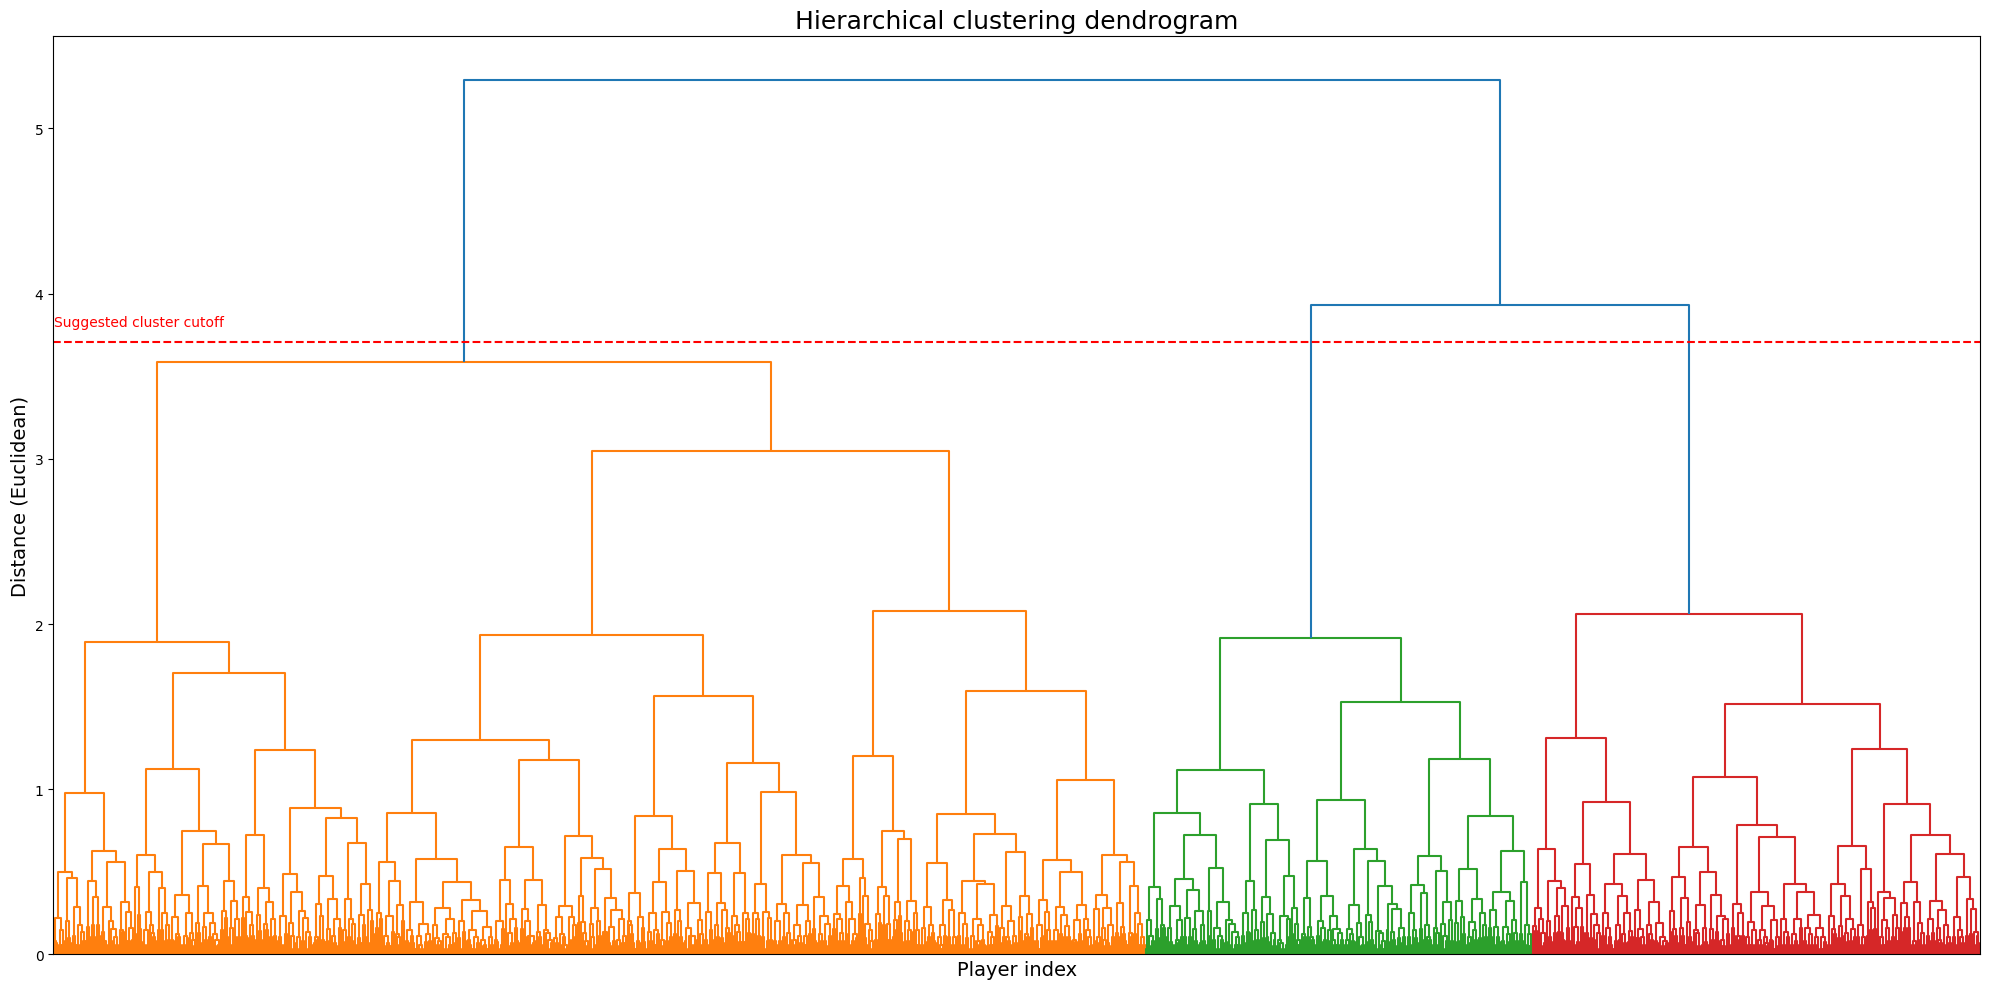

In [ ]:
# This code uses hierarchical clustering to group our player data (hours spent playing a game and hours spent chatting).
# Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters.

# Key Concepts:

# Dendrogram: The output of hierarchical clustering is often visualized in a dendrogram,
# which is a tree-like diagram that illustrates the arrangement of clusters.
# Each step in the tree represents a "merging" of two groups, which are progressively combined into larger clusters as the hierarchy grows.

#Linkage: This defines how the distances between clusters are measured. Common linkage methods are:
# - Single linkage: The distance between two clusters is defined as the minimum distance between points in the two clusters.
# - Complete linkage: The distance between two clusters is defined as the maximum distance between points in the two clusters.
# - Average linkage: The distance between two clusters is defined as the average distance between all points in the two clusters.
# - Ward linkage: The distance between clusters is minimized by minimizing the total variance within all clusters.

# We will use scipy's linkage function for hierarchical clustering and visualize the result using a dendrogram.

# Import necessary libraries
import numpy as np  # Importing numpy for array manipulation
from scipy.cluster.hierarchy import dendrogram, linkage  # Importing scipy for hierarchical clustering
import matplotlib.pyplot as plt  # Importing matplotlib for plotting the dendrogram

# We have already read the player data in previous steps. We use the player data (gameplay and chat hours) for clustering.
# In the 'data' variable, we have the matrix with the player data.
# We will use this data for hierarchical clustering.
# New session, need to mount the Drive again:
from google.colab import drive
drive.mount('/content/drive')
# Define the path to my data file
data_path = '/content/drive/MyDrive/ColabNotebooks/AI'

# Define the function to read player data from file
def load_player_data(file_name):
    with open(file_name) as file:  # Open the file in read mode
# Read each line, strip trailing whitespace, and split by tab characters
        lines = [(line.strip()).split('\t') for line in file]

# Convert the first column (hours of gameplay) to floats
    gameplay_hours = [float(x[0]) for x in lines]

# Convert the second column (hours of chat) to floats
    chat_hours = [float(x[1]) for x in lines]

# Create a matrix by stacking the gameplay hours and chat hours
# Each row in the matrix represents a player, with columns for gameplay and chat hours
    player_data = np.column_stack((gameplay_hours, chat_hours))

    return player_data  # Return the matrix

# Change directories to where our data is
%cd "/content/drive/MyDrive/ColabNotebooks/AI"

# Then load the player data from our file
player_data = load_player_data('players.data')

# Print the shape to verify it loaded correctly
print(f"Data shape: {player_data.shape}")


# Hierarchical clustering using the 'complete' linkage method and 'euclidean' distance metric
# The linkage function returns a linkage matrix that encodes the hierarchical clustering of the data.

# The 'complete' method merges clusters based on the maximum distance between any pair of points in the clusters.
# 'euclidean' refers to the distance measure used to compute how far apart the points are.
linkage_matrix = linkage(player_data, method='complete', metric='euclidean')

# Now let's visualize the result with a dendrogram. The dendrogram will help us understand the structure of the clusters.

# Visualize the clustering with a dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical clustering dendrogram', fontsize=18)
plt.xlabel('Player index', fontsize=14)
plt.ylabel('Distance (Euclidean)', fontsize=14)

# Create the dendrogram
dendrogram(
    linkage_matrix,
    orientation='top',  # Plot the root at the top, leaves at the bottom
    no_labels=True,     # Don't show leaf labels
    leaf_font_size=10   # Size of leaf labels, if shown
)

# Add a horizontal line to suggest a cut for forming clusters
max_dist = max(linkage_matrix[:,2])
suggested_cutoff = max_dist * 0.7  # 70% of max distance as an example
plt.axhline(y=suggested_cutoff, color='r', linestyle='--')
plt.text(5, suggested_cutoff + 0.1, 'Suggested cluster cutoff', color='r')

plt.tight_layout()
plt.show()

# Explanation of the linkage matrix:
# - The linkage matrix has a size of (n-1) × 4, where n is the number of original data points
# - Each row represents a merging of two clusters
# - Column 0 (id1): Index of the first cluster being merged
# - Column 1 (id2): Index of the second cluster being merged
# - Column 2 (dist): Distance between the two clusters
# - Column 3 (size): Number of original observations in the newly formed cluster
#
# For indices < n (where n is the number of original observations), the index corresponds to an original point
# For indices >= n, the index corresponds to a previously formed cluster (index - n)
#
# The format of the rows in the linkage matrix is as follows:
# id1=14 id2=19 dist=0.0250 num=2 means that cluster 14 and cluster 19 were merged at a distance of 0.0250,
# and the newly formed cluster contains 2 points.



# **Code 2.10. **Dendrogram visualization for hierarchical clustering (done in 2.09 already)

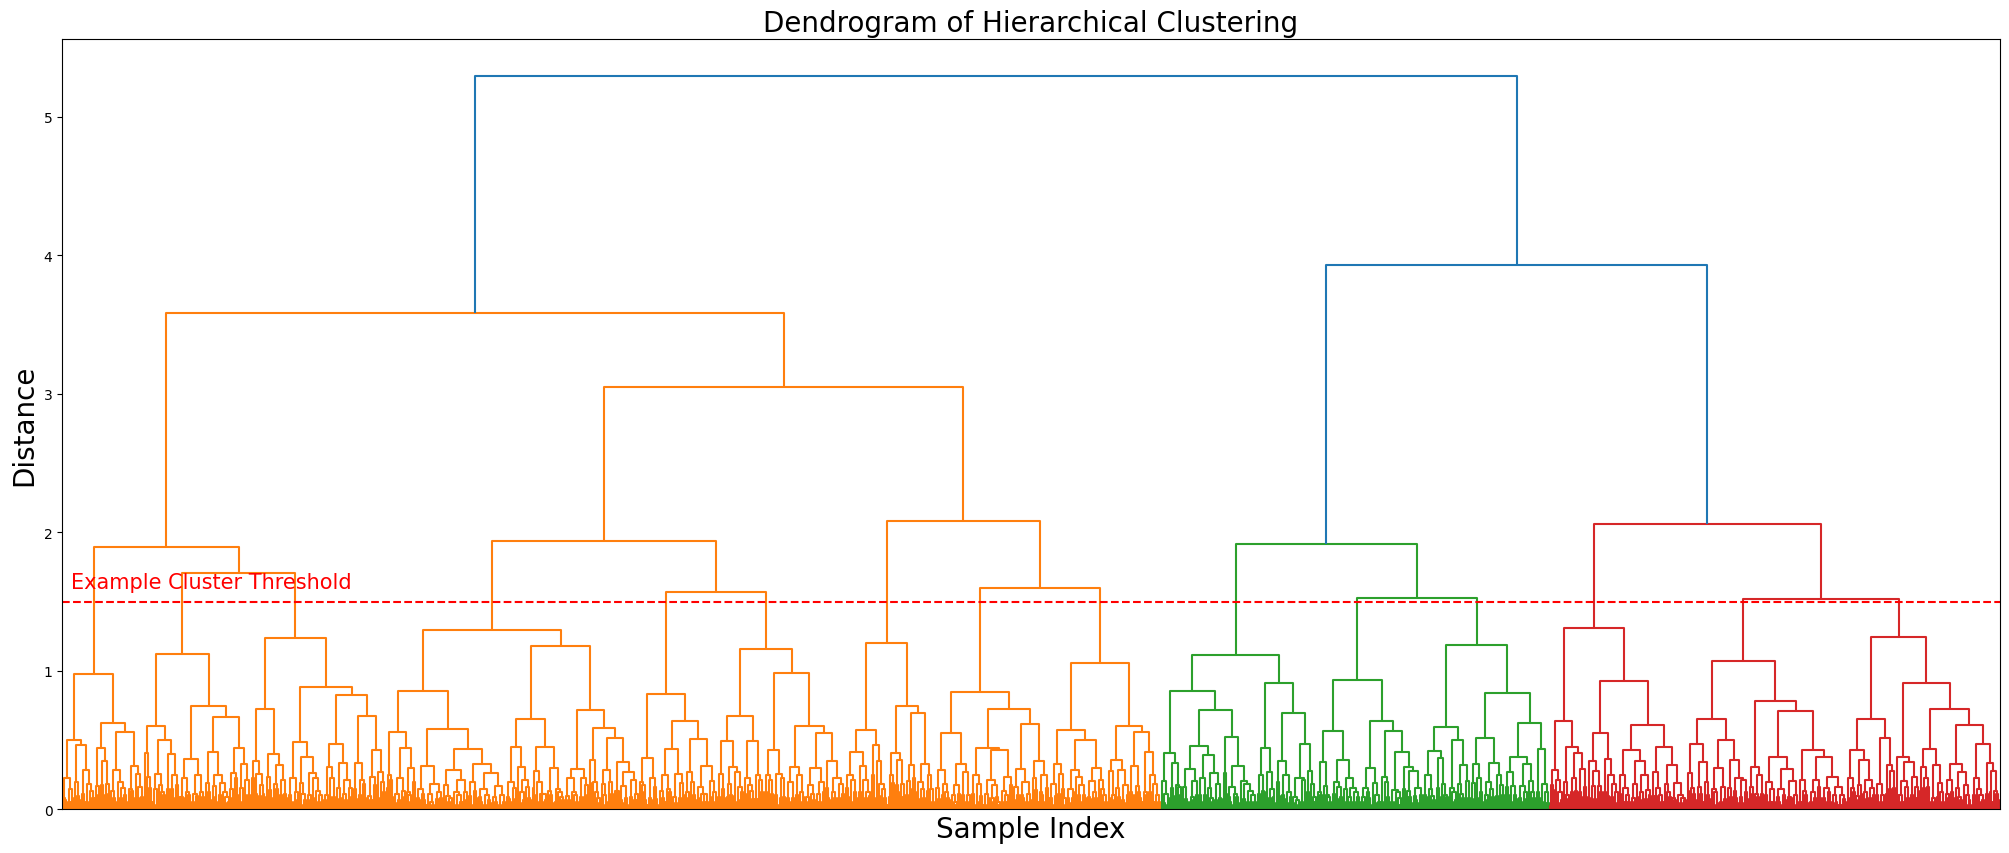

In [ ]:
# This code creates a visual representation (dendrogram) of the hierarchical clustering
# we performed in the previous step. A dendrogram is a tree-like diagram that shows
# the relationships between clusters and how they merge at different similarity levels.

# Import necessary libraries
from matplotlib import pyplot as plt  # For creating visualizations
from scipy.cluster.hierarchy import dendrogram  # For creating the dendrogram

# We already have our linkage_matrix from the previous step (Code 2.9)
# If we're running this separately, make sure we have the linkage_matrix calculated

# Now we'll create a visualization of the dendrogram
# First, set up the figure with a large size for better visibility
plt.figure(figsize=(25, 10))  # Create a figure that's 25 inches wide by 10 inches tall

# Add title and axis labels to make the visualization more informative
plt.title('Dendrogram of Hierarchical Clustering', fontsize=20)  # Add a title with large font
plt.xlabel('Sample Index', fontsize=20)  # Label for x-axis
plt.ylabel('Distance', fontsize=20)  # Label for y-axis

# Create the dendrogram using our linkage matrix
dendrogram(
    linkage_matrix,     # The linkage matrix we created earlier
    orientation='top',  # Place the root at the top and leaves at the bottom
    no_labels=True      # Don't display labels for individual data points (too many to be useful)
)

# Add a horizontal line to show a potential clustering threshold
cutoff_height = 1.5  # Arbitrary cutoff height for demonstration
plt.axhline(y=cutoff_height, color='r', linestyle='--')
plt.text(100, cutoff_height + 0.1, 'Example Cluster Threshold', color='r', fontsize=15)

# Display the dendrogram
plt.show()

# Interpreting the dendrogram:
# 1. The y-axis (Distance) represents the dissimilarity between clusters
# 2. The x-axis represents individual data points (in this case, players)
# 3. Each vertical line represents a merge between clusters
# 4. The height of each merge (where horizontal lines appear) shows the distance at which clusters were merged
# 5. To identify distinct clusters, we can "cut" the dendrogram horizontally at a specific height
#    - Points connected below the cut line belong to the same cluster
#    - The red dashed line shows an example of such a cut

# Key insights from dendrograms:
# - Clusters that merge at lower heights are more similar to each other
# - The overall structure reveals natural groupings in our data
# - By examining where large jumps in merge height occur, we can identify
#   a reasonable number of clusters to use

# **Code 2.11**. K-means clustering

Cluster assignments for the first 20 players:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Number of players in each cluster: [672 450 465 497]

Cluster centers (centroids):
Cluster 0: Gameplay Hours = 2.02, Chat Hours = 2.99
Cluster 1: Gameplay Hours = 3.29, Chat Hours = 1.21
Cluster 2: Gameplay Hours = 3.22, Chat Hours = 3.93
Cluster 3: Gameplay Hours = 1.14, Chat Hours = 1.08

Predicted clusters for new players:
Player with 2 hours gameplay and 3 hours chat belongs to Cluster 0
Player with 4 hours gameplay and 1 hours chat belongs to Cluster 1


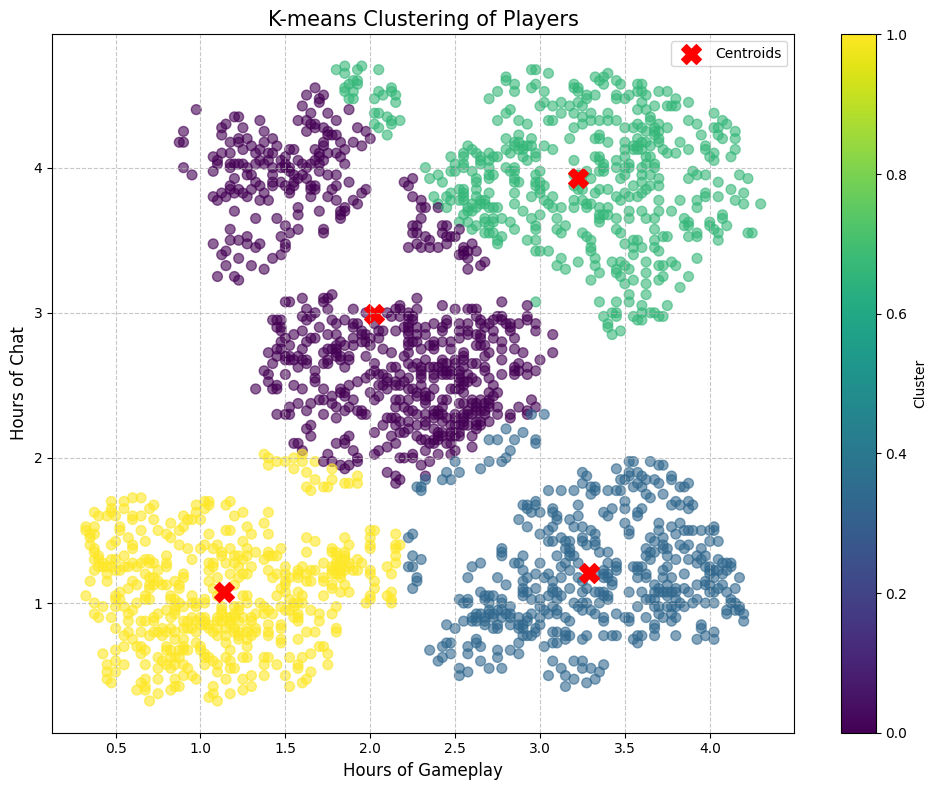


Cluster interpretations:
Cluster 0: Casual players (lower gameplay and chat)
Cluster 1: Game-focused players (high gameplay, lower chat)
Cluster 2: Highly engaged players (high gameplay and chat)
Cluster 3: Casual players (lower gameplay and chat)


In [ ]:
# This code implements K-means clustering on player data (hours spent playing a game and hours spent chatting).
# K-means is one of the most popular and simple clustering algorithms that groups data into k clusters.

# Key Concepts:
# - K-means partitions data into k non-overlapping clusters
# - Each cluster is represented by its centroid (center point)
# - The algorithm works by:
#   1. Initializing k centroids (often randomly)
#   2. Assigning each data point to the nearest centroid
#   3. Recalculating centroids based on the mean of all points in each cluster
#   4. Repeating steps 2-3 until convergence (centroids don't change significantly)

# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans  # scikit-learn's implementation of K-means
import matplotlib.pyplot as plt

# First, let's ensure we have our player data loaded
# If running this code separately, make sure to load the data first
# The following assumes we have already loaded our player data into the variable 'player_data'

# If we need to load the data again:
# def load_player_data(file_name):
#    with open(file_name) as file:
#        lines = [(line.strip()).split('\t') for line in file]
#
#    gameplay_hours = [float(x[0]) for x in lines]
#    chat_hours = [float(x[1]) for x in lines]
#
#    return np.column_stack((gameplay_hours, chat_hours))

# If we need to load the data again, uncomment :
# %cd "/content/drive/MyDrive/ColabNotebooks/AI"
# player_data = load_player_data('players.data')

# Configure and apply K-means clustering
# We'll create 4 clusters as specified in the original code
kmeans = KMeans(
    n_clusters=4,       # Number of clusters to form
    init='k-means++',   # Initialization method (k-means++ is more effective than random)
    n_init=10,          # Number of times the algorithm will run with different centroid seeds
    max_iter=300,       # Maximum number of iterations for a single run
    random_state=42     # For reproducibility
)

# Fit the model to our player data
kmeans.fit(player_data)

# Now we have the K-means model trained on our data
# We can examine the results

# 1. Cluster assignments for each player
# This shows which cluster each player belongs to (0, 1, 2, or 3)
cluster_labels = kmeans.labels_
print("Cluster assignments for the first 20 players:")
print(cluster_labels[:20])
print(f"Number of players in each cluster: {np.bincount(cluster_labels)}")

# 2. Cluster centers (centroids)
# These are the mean values for each feature within each cluster
centroids = kmeans.cluster_centers_
print("\nCluster centers (centroids):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: Gameplay Hours = {centroid[0]:.2f}, Chat Hours = {centroid[1]:.2f}")

# 3. Predicting cluster for new data points
# We can use the model to predict which cluster new players would belong to
new_players = np.array([[2, 3], [4, 1]])  # Two new players: [gameplay_hours, chat_hours]
predictions = kmeans.predict(new_players)
print("\nPredicted clusters for new players:")
for player, cluster in zip(new_players, predictions):
    print(f"Player with {player[0]} hours gameplay and {player[1]} hours chat belongs to Cluster {cluster}")

# 4. Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(
    player_data[:, 0], player_data[:, 1],  # x=gameplay hours, y=chat hours
    c=cluster_labels,                       # color by cluster assignment
    cmap='viridis',                         # colormap
    alpha=0.6,                              # transparency
    s=50                                    # marker size
)

# Plot the centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title('K-means Clustering of Players', fontsize=15)
plt.xlabel('Hours of Gameplay', fontsize=12)
plt.ylabel('Hours of Chat', fontsize=12)
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Interpreting the results
# Based on the centroids, we can characterize each cluster:
print("\nCluster interpretations:")
for i, centroid in enumerate(centroids):
    if centroid[0] > 3 and centroid[1] > 3:
        print(f"Cluster {i}: Highly engaged players (high gameplay and chat)")
    elif centroid[0] > 3 and centroid[1] <= 3:
        print(f"Cluster {i}: Game-focused players (high gameplay, lower chat)")
    elif centroid[0] <= 3 and centroid[1] > 3:
        print(f"Cluster {i}: Social players (lower gameplay, high chat)")
    else:
        print(f"Cluster {i}: Casual players (lower gameplay and chat)")

# **Code 2.12.** Spectral clustering